In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
import time
from collections import deque 

## Variable Global

In [2]:
matrizDistancias = []
tiempo = 0

## Funciones Auxiliares Comunes

In [3]:
# Dado un String, Lee el archivo correspondiente
def leeArchivo(archivo):
    f = open("tsp/" + archivo)
    x = []
    y = []
    cont = 0;
    for linea in f:
        cont += 1
        sp = linea.split(" ")
        if cont > 6 and sp[0] != "EOF\n":
            i = -2
            xp = sp[i]
            while xp == "":
                i -= 1
                xp = sp[i]
            yp = sp[-1].split("\n")
            x.append(float(xp))
            y.append(float(yp[0]))  
    return x,y

In [4]:
# Calcula la distancia entre dos puntos (x,y) - (x2,y2)
def calculaDistancia(x, y, x2, y2):
    xd = x - x2
    yd = y - y2
    return round(math.sqrt(xd*xd + yd*yd))

In [5]:
# Pinta todos los puntos recibiendo una lista de puntos x e y
def pintaMapa(x,y):
    plt.figure(figsize=(15, 8))
    plt.scatter(x,y)
    plt.show()

In [6]:
# Dado un vector de resultado, pinta el resultado de este vector sobre los puntos
def pintaCamino(v,x,y,coste):
    plt.figure(figsize=(15, 8))
    xc = []
    yc = []
    for i in v:
            xc.append(x[i])
            yc.append(y[i])
    
    xc.append(x[v[0]])
    yc.append(y[v[0]])
    
    plt.plot(xc,yc,"y")
    plt.scatter(x,y, c = "black")
    plt.scatter(xc[0],yc[0],c="green")
    plt.scatter(xc[-2],yc[-2],c="red")
    
    plt.suptitle("Mejor camino con coste " + str(coste),fontsize=20)
    
    plt.show()    

In [7]:
# Calcula matriz de distancias
def calculaMatrizDistancias(x,y):
    global matrizDistancias 
    matrizDistancias = np.zeros((len(x),len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            matrizDistancias[i,j] = calculaDistancia(x[i],y[i],x[j],y[j])

In [8]:
# Calcula Coste del vector Solucion
def calculaCoste(vResultado):
    kms = 0;
    for i in range(1,len(vResultado)):
            kms += matrizDistancias[vResultado[i-1]][vResultado[i]]
    kms += matrizDistancias[vResultado[-1]][vResultado[0]]
    return kms

In [9]:
# Calcula Coste Vecino
def calculaCosteVecino(costeSolAntigua, sAntigua, sActual, i1, i2):
    if i1 + 1 > len(sActual) - 1:
        piv1 = 0
    else:
        piv1 = i1 + 1
    
    if i2 + 1 > len(sActual) - 1:
        piv = 0
    else:
        piv = i2 + 1
    
    
    coste = costeSolAntigua - matrizDistancias[sAntigua[i1 - 1]][sAntigua[i1]] - matrizDistancias[sAntigua[ piv1]][sAntigua[i1]]
    coste = coste - matrizDistancias[sAntigua[i2 - 1]][sAntigua[i2]] - matrizDistancias[sAntigua[piv]][sAntigua[i2]]
    coste = coste + matrizDistancias[sActual[i1 - 1]][sActual[i1]] + matrizDistancias[sActual[ piv1]][sActual[i1]]
    coste = coste + matrizDistancias[sActual[i2 - 1]][sActual[i2]] + matrizDistancias[sActual[piv]][sActual[i2]]
    return coste

In [10]:
# Genera solucion aleatoria
def solucionAleatoria(tam, num):
    vResult = list(range(0,tam))
    random.seed(num)
    for i in range(0,tam):
        rnd = random.randint(0,tam-1)
        vResult[i], vResult[rnd] = vResult[rnd], vResult[i]
    return vResult

In [11]:
# Tic
def tic():
    global tiempo 
    tiempo = time.time()

In [12]:
# Toc
def toc():
    global tiempo 
    return  (time.time() - tiempo)

In [13]:
def representaResultados(analisisResultado):
    tablaFinal = pd.DataFrame(columns=["Semilla","Coste","Numero Evaluaciones", "Tiempo"])
    for i in range(0,10):
        tablaFinal.loc[len(tablaFinal)] = [analisisResultado[i][0],analisisResultado[i][1],analisisResultado[i][2],analisisResultado[i][3]]
        
    display(tablaFinal)
    print("Media coste: ", tablaFinal[["Coste"]].mean()[0])
    print("Desviación típica coste: ", tablaFinal[["Coste"]].std()[0])
    print("Media numero de evaluaciones: ", tablaFinal[["Numero Evaluaciones"]].mean()[0])
    print("Desviación típica de evaluaciones: ", tablaFinal[["Numero Evaluaciones"]].std()[0])
    print("Media tiempo: ", tablaFinal[["Tiempo"]].mean()[0])

# Fichero a Analizar

In [14]:
# x, y = leeArchivo("st70.tsp")
# x, y = leeArchivo("ch130.tsp")
# x, y = leeArchivo("a280.tsp")
x, y = leeArchivo("p654.tsp")
# x, y = leeArchivo("vm1084.tsp")
# x, y = leeArchivo("vm1748.tsp")
calculaMatrizDistancias(x,y)

# Algoritmo Greedy

In [15]:
# Algoritmo Greedy
def greedy(x,y,mostrar):
    tic()
    vResultado = [];
    nodosNoVisitados = list(range(0,len(x)))
    i = 0;
    vResultado.append(nodosNoVisitados[i])
    del nodosNoVisitados[i]
    while i < len(x) and nodosNoVisitados != []:
        nodoActual = vResultado[-1]
        ordenad = np.sort(matrizDistancias[nodoActual,:])
        k = 0
        encontrado = False
        while k < len(y) and encontrado == False:      
            minimo = np.where(ordenad[k] == matrizDistancias[nodoActual,:])
            max = len(minimo[0])
            z = 0
            while z < max and encontrado == False:
                if (minimo[0][z] in vResultado):
                    k += 1
                    z += 1
                else:
                    encontrado = True
        vResultado.append(minimo[0][z])
        nodosNoVisitados.remove(minimo[0][z])
        i += 1
    km = calculaCoste(vResultado)
    t = toc()
    # pintaMapa(x,y)
    if mostrar == "s":
        print("Tiempo de ejecucion = " + str(t))
        pintaCamino(vResultado,x,y, km)
    return vResultado, km

Tiempo de ejecucion = 0.07678103446960449


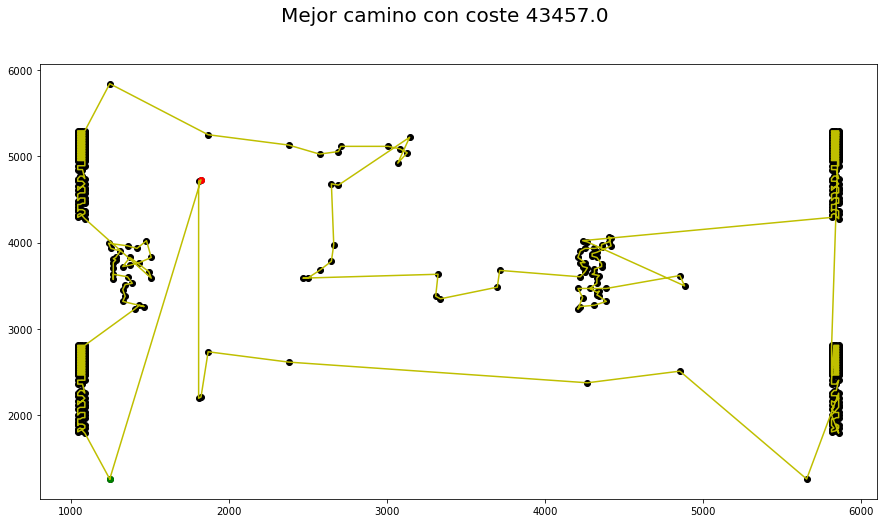

In [16]:
# Greedy
resultado, km = greedy(x, y,"s")

# Busqueda Aleatoria

In [17]:
# Algoritmo Busqueda Aleatoria
def busquedaAleatoria(x,y):
    tam = len(x)
    analisisResultado = []
    mejorCam = []
    costeFinal = float("inf")
    for z in range(0,10):
        resultadoIntermedio = []
        tic()
        mejorCoste = float("inf")
        mejor = [];
        random.seed(z)
        for j in range(0,1600*tam):
            vResult = list(range(0,tam))
            for i in range(0,tam):
                rnd = random.randint(0,tam-1)
                vResult[i], vResult[rnd] = vResult[rnd], vResult[i]
            coste = calculaCoste(vResult)
            if coste < mejorCoste:
                mejor = vResult.copy()
                mejorCoste = coste

        if mejorCoste < costeFinal:
            costeFinal = mejorCoste
            mejorCam = mejor.copy()
        t = toc()
        resultadoIntermedio.append(z)
        resultadoIntermedio.append(mejorCoste)
        resultadoIntermedio.append(t)
        analisisResultado.append(resultadoIntermedio)
        
    representaResultados(analisisResultado)
    pintaCamino(mejorCam,x,y, costeFinal)

,Semilla,Coste,Tiempo
0,0.0,1794114.0,1173.963447
1,1.0,1809713.0,1173.508821
2,2.0,1798827.0,1129.348398
3,3.0,1806317.0,1034.030576
4,4.0,1803585.0,1042.722283
5,5.0,1807866.0,1073.054262
6,6.0,1807271.0,1137.696133
7,7.0,1817079.0,1048.035558
8,8.0,1819544.0,1062.586954
9,9.0,1810228.0,1057.026285


Media coste:  1807454.4
Desviación típica coste:  7604.478011160412


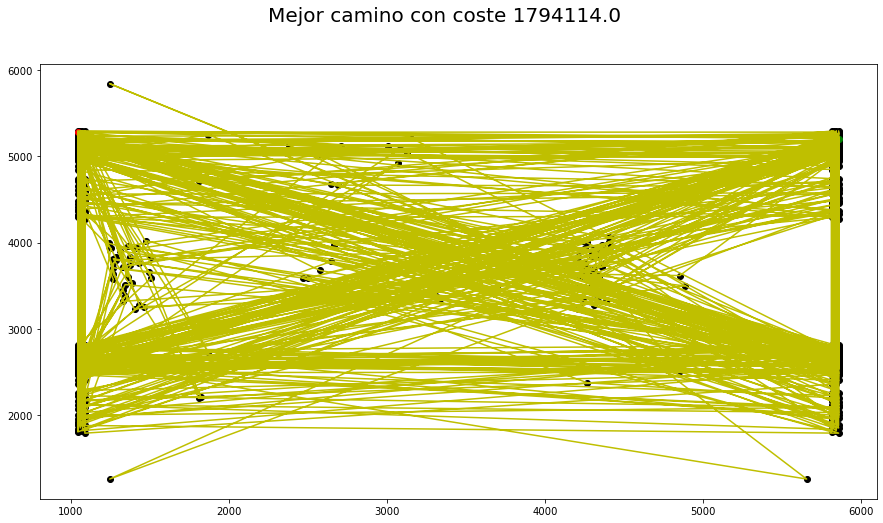

In [20]:
# Busqueda Aleatoria
busquedaAleatoria(x, y)

# Busquedas Locales

## Busqueda Local El Mejor

In [18]:
# Devuelve el mejor vecino
def mejorVecino(w, sumador, maximo):
    mejor = w;
    mejorCoste = calculaCoste(w)
    costeSolAntigua = mejorCoste.copy()
    for i in range(0, len(w)):
        for j in range(i + 1,len(w)):
            w2 = w.copy();
            w2[i], w2[j] = w2[j], w2[i]
            coste = calculaCosteVecino(costeSolAntigua, w, w2, i, j)
            if coste < mejorCoste :
                mejor = w2
                mejorCoste = coste
            if sumador >= maximo:
                break
            else :
                sumador +=1
        if sumador >= maximo:
            break
    return mejor, mejorCoste, sumador

In [19]:
# Algoritmo Busqueda Local El Mejor
def busquedaLocalElMejor(x,y):
    analisisResultado = []
    mejorCam = []
    costeFinal = float("inf")
    for z in range(0,10):
        resultadoIntermedio = []
        tic()
        w = solucionAleatoria(len(x),z)
        costeActual = calculaCoste(w)
        mejorV = []
        encontrado = False
        maximo = 1600 * len(x)
        i = 0
        while encontrado == False:
            mejorV, mejorCost, i = mejorVecino(w, i, maximo)
            if mejorCost < costeActual:
                w = mejorV.copy()
                costeActual = mejorCost
            elif i > maximo or mejorCost >= costeActual:
                encontrado = True
                
        if costeActual < costeFinal:
            costeFinal = costeActual
            mejorCam = w.copy()
        
        t = toc()
        resultadoIntermedio.append(z)
        resultadoIntermedio.append(costeActual)
        resultadoIntermedio.append(i)
        resultadoIntermedio.append(t)
        analisisResultado.append(resultadoIntermedio)
        
    representaResultados(analisisResultado)
    pintaCamino(mejorCam,x,y, costeFinal)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,1947268.0,1046400.0,6.968332
1,1.0,1928171.0,1046400.0,7.694481
2,2.0,1926013.0,1046400.0,7.502507
3,3.0,1956574.0,1046400.0,7.895184
4,4.0,1903639.0,1046400.0,7.195200
5,5.0,1975520.0,1046400.0,7.694063
6,6.0,1887608.0,1046400.0,7.455880
7,7.0,1877150.0,1046400.0,7.404293
8,8.0,1972958.0,1046400.0,7.729021
9,9.0,1947949.0,1046400.0,7.693193


Media coste:  1932285.0
Desviación típica coste:  34150.19718504972
Media numero de evaluaciones:  1046400.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  7.5232154607772825


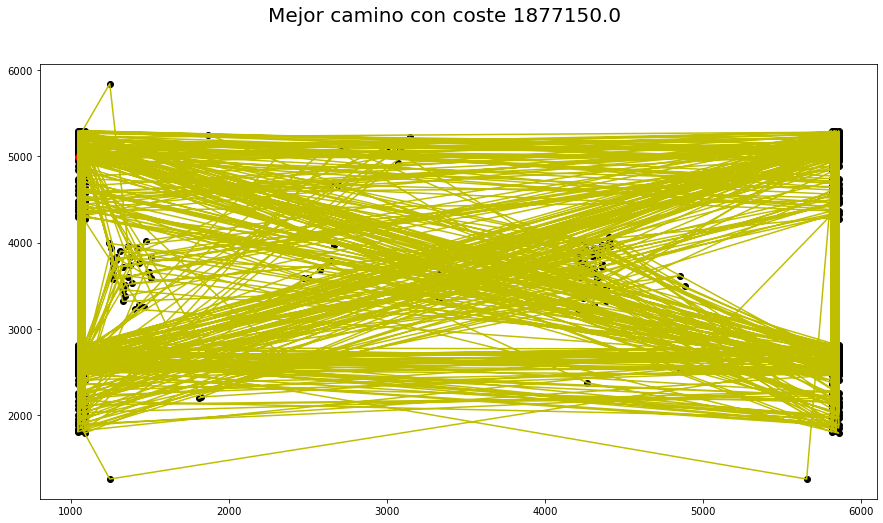

In [20]:
# Busqueda Local El Mejor
busquedaLocalElMejor(x, y)

## Busqueda Local El Primer Mejor

In [21]:
# Devuelve el primer mejor vecino
def primerMejorVecino(w, sumador, maximo):
    actual = w;
    actualCoste = calculaCoste(w)
    i = 0
    encontrado = False
    while i < len(w) and encontrado == False:
        j = i + 1
        while j < len(w) and encontrado == False:
            mejor = actual.copy()
            mejor[i], mejor[j] = mejor[j], mejor[i]
            coste = calculaCosteVecino(actualCoste, actual, mejor, i, j)
            if coste < actualCoste:
                encontrado = True
            else:
                j += 1
            if sumador >= maximo:
                break
            else :
                sumador +=1
        if sumador >= maximo:
            break
        i += 1
    if actualCoste == coste:
        mejor = w
        coste = actualCoste
    return mejor, coste, sumador

In [22]:
# Algoritmo Busqueda Local El Primer Mejor
def busquedaLocalElPrimerMejor(x,y):
    analisisResultado = []
    mejorCam = []
    costeFinal = float("inf")
    for z in range(0,10):
        resultadoIntermedio = []
        tic()
        w = solucionAleatoria(len(x),z)
        costeActual = calculaCoste(w)
        mejorV = []
        encontrado = False
        maximo = 1600 * len(x)
        i = 0
        while encontrado == False:
            mejorV, mejorCost, i = primerMejorVecino(w, i, maximo)
            if mejorCost < costeActual:
                w = mejorV.copy()
                costeActual = mejorCost
                i += 1
            elif i > maximo or mejorCost >= costeActual:
                encontrado = True
        
        if costeActual < costeFinal:
            costeFinal = costeActual
            mejorCam = w.copy()
        
        t = toc()
        resultadoIntermedio.append(z)
        resultadoIntermedio.append(costeActual)
        resultadoIntermedio.append(i)
        resultadoIntermedio.append(t)
        analisisResultado.append(resultadoIntermedio)
        
    representaResultados(analisisResultado)
    pintaCamino(mejorCam,x,y, costeFinal)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,478747.0,1046400.0,9.789953
1,1.0,507788.0,1046400.0,9.789822
2,2.0,545978.0,1046400.0,9.268316
3,3.0,455930.0,1046400.0,9.477024
4,4.0,807625.0,1046400.0,9.042704
5,5.0,753523.0,1046400.0,8.804397
6,6.0,654645.0,1046400.0,8.432889
7,7.0,474710.0,1046400.0,9.044803
8,8.0,469655.0,1046400.0,9.417526
9,9.0,481185.0,1046400.0,9.273932


Media coste:  562978.6
Desviación típica coste:  128945.28524679675
Media numero de evaluaciones:  1046400.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  9.234136581420898


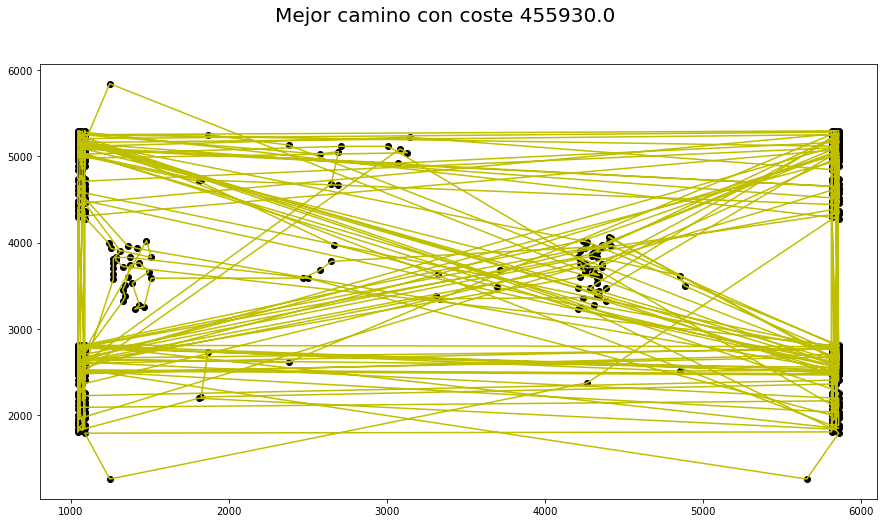

In [23]:
# Busqueda Local El Primero Mejor
busquedaLocalElPrimerMejor(x, y)

## Busqueda Local El Mejor Aleatorizado

In [24]:
# Devuelve el mejor vecino Aleatorizado
def mejorVecinoAleatorizado(w, numVecinos, sumador, maximo):
    mejor = w;
    mejorCoste = calculaCoste(w)
    costeSolAntigua = mejorCoste
    for i in range(0, numVecinos):
        w2 = w.copy();
        rnd1 = random.randint(0,len(w) - 1)
        rnd2 = random.randint(0,len(w) - 1)
        w2[rnd1], w2[rnd2] = w2[rnd2], w2[rnd1]       
        coste = calculaCosteVecino(costeSolAntigua, w, w2, rnd1, rnd2)
        if coste < mejorCoste :
            mejor = w2
            mejorCoste = coste 
        if sumador >= maximo:
            break
        else :
            sumador +=1
    return mejor, mejorCoste, sumador

In [25]:
# Algoritmo Busqueda Local El Mejor Aleatorizado
def busquedaLocalElMejorAleatorizado(x,y,numVecinosLim, k):
    analisisResultado = []
    mejorCam = []
    costeFinal = float("inf")
    for z in range(0,10):
        resultadoIntermedio = []
        tic()
        w = solucionAleatoria(len(x),z)
        costeActual = calculaCoste(w)
        mejorV = []
        encontrado = False
        maximo = 1600 * len(x)
        i = 0
        encontrado = False
        while i < maximo and encontrado == False:
            iterador = 0
            fueraBucle = False
            while iterador < k and fueraBucle == False:
                iterador += 1
                mejorV, mejorCost, i = mejorVecinoAleatorizado(w, numVecinosLim, i, maximo)  
                if mejorCost < costeActual or iterador > k:
                    fueraBucle = True
            if mejorCost < costeActual:
                w = mejorV.copy()
                costeActual = mejorCost
            elif i > maximo or mejorCost >= costeActual:
                encontrado = True
                
        if costeActual < costeFinal:
            costeFinal = costeActual
            mejorCam = w.copy()
        
        t = toc()
        resultadoIntermedio.append(z)
        resultadoIntermedio.append(costeActual)
        resultadoIntermedio.append(i)
        resultadoIntermedio.append(t)
        analisisResultado.append(resultadoIntermedio)
        
    representaResultados(analisisResultado)
    pintaCamino(mejorCam,x,y, costeFinal)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,413659.0,480363.0,4.780428
1,1.0,376858.0,559170.0,6.069813
2,2.0,411435.0,683757.0,7.455464
3,3.0,400989.0,535953.0,5.967618
4,4.0,345298.0,646479.0,7.025908
5,5.0,415186.0,544128.0,5.958245
6,6.0,399931.0,501291.0,5.336801
7,7.0,425366.0,509466.0,5.122138
8,8.0,368881.0,693894.0,7.560803
9,9.0,416883.0,513063.0,5.477881


Media coste:  397448.6
Desviación típica coste:  25622.36726508046
Media numero de evaluaciones:  566756.4
Desviación típica de evaluaciones:  78628.49312812755
Media tiempo:  6.075510001182556


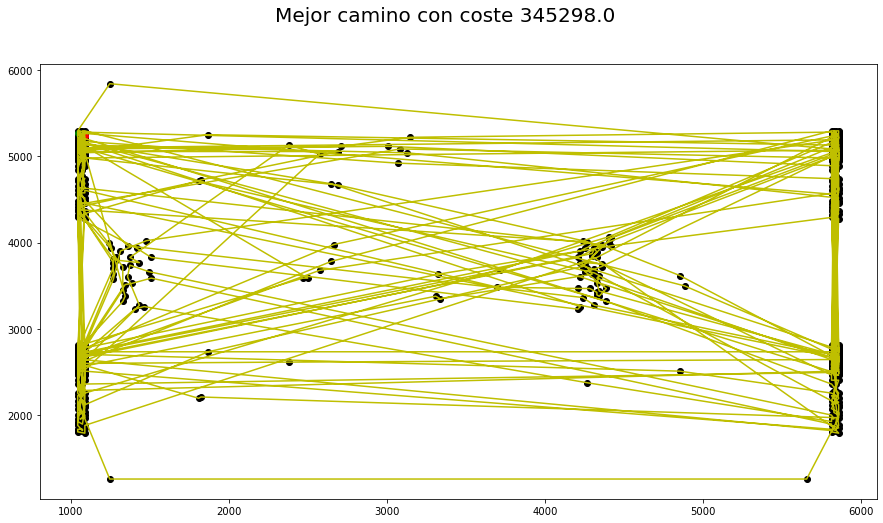

In [26]:
# Busqueda Local El Mejor Aleatorizado
numVecinosLim = round(len(x) / 2)
k = 5
busquedaLocalElMejorAleatorizado(x, y, numVecinosLim, k)

# Enfriamiento Simulado

In [27]:
# Selecciona candidatos
def seleccionaSolucion(sActual, coste):
    rnd1 = random.randint(0,len(sActual) - 1)
    rnd2 = random.randint(0,len(sActual) - 1)
    sCandidata = sActual.copy()
    sCandidata[rnd1], sCandidata[rnd2] = sCandidata[rnd2], sCandidata[rnd1]
    costeCandiata = calculaCosteVecino(coste, sActual, sCandidata, rnd1, rnd2)
    return sCandidata, costeCandiata

In [28]:
# Algoritmo de Enfriamiento Simulado
def enfriamientoSimuladoIteraciones(x, y, mu, phi, L):
    analisisResultado = []
    mejorCam = []
    costeFinal = float("inf")
    for z in range(0,10):
        resultadoIntermedio = []
        tic()
        sActual = solucionAleatoria(len(x),z)
        costeActual = calculaCoste(sActual)
        sBest = sActual.copy()
        costeBest = costeActual  
        numIteraciones = 80 * len(x)
        evaluaciones = 0
        resultado, km = greedy(x, y,"n")
        Tinicial = (mu /(- np.log(phi))) * km
        iterador = 0
        T = Tinicial
        while iterador < numIteraciones:
            for i in range(0,L):
                sCandidata, costeCandidata = seleccionaSolucion(sActual, costeActual)
                evaluaciones += 1
                delta = costeCandidata - costeActual
                exponente = (- delta) / T
                if (delta < 0) or (random.uniform(0, 1) < math.e**exponente):
                    sActual = sCandidata
                    costeActual = costeCandidata
                    if costeActual < costeBest:
                        sBest = sActual
                        costeBest = costeActual
            T = Tinicial / (1 + iterador)
            iterador += 1

        if costeBest < costeFinal:
            costeFinal = costeBest
            mejorCam = sBest.copy()
        
        t = toc()
        resultadoIntermedio.append(z)
        resultadoIntermedio.append(costeBest)
        resultadoIntermedio.append(evaluaciones)
        resultadoIntermedio.append(t)
        analisisResultado.append(resultadoIntermedio)
        
    representaResultados(analisisResultado)
    pintaCamino(mejorCam,x,y, costeFinal)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,301305.0,1046400.0,18.269256
1,1.0,331266.0,1046400.0,18.186014
2,2.0,332744.0,1046400.0,18.958130
3,3.0,341234.0,1046400.0,18.461195
4,4.0,324331.0,1046400.0,17.309714
5,5.0,378196.0,1046400.0,15.752450
6,6.0,329041.0,1046400.0,16.261235
7,7.0,305838.0,1046400.0,16.958153
8,8.0,305848.0,1046400.0,16.964770
9,9.0,327907.0,1046400.0,17.931587


Media coste:  327771.0
Desviación típica coste:  22202.270449463296
Media numero de evaluaciones:  1046400.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  17.505250406265258


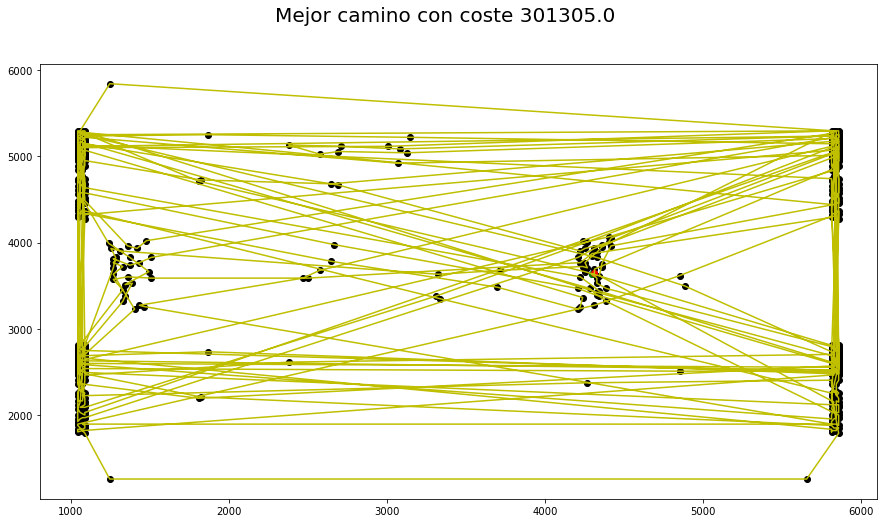

In [19]:
# Algoritmo de Enfriamiento Simulado
# Si el incremento el numero de vecinos (L) aumento la exploración y puedo conseguir llegar a un minimo
# Si el incremento es demasiado bajo, es un algoritmo muy parecido a la busqueda local del mejor aleatorizado
# Con alpha ( o metodo de enfriamiento) y L podemos variar la pendiente de la gráfica, es decir, explorar mas o menos
mu = 0.3
phi = 0.3
L = 20
enfriamientoSimuladoIteraciones(x, y, mu, phi, L)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,317629.0,1046400.0,14.196895
1,1.0,323661.0,1046400.0,14.950802
2,2.0,312557.0,1046400.0,13.757656
3,3.0,322273.0,1046400.0,11.571949
4,4.0,354085.0,1046400.0,12.157975
5,5.0,364429.0,1046400.0,11.998084
6,6.0,335737.0,1046400.0,12.135008
7,7.0,344847.0,1046400.0,12.769454
8,8.0,306724.0,1046400.0,12.989428
9,9.0,324586.0,1046400.0,12.334070


Media coste:  330652.8
Desviación típica coste:  18686.897601141703
Media numero de evaluaciones:  1046400.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  12.88613202571869


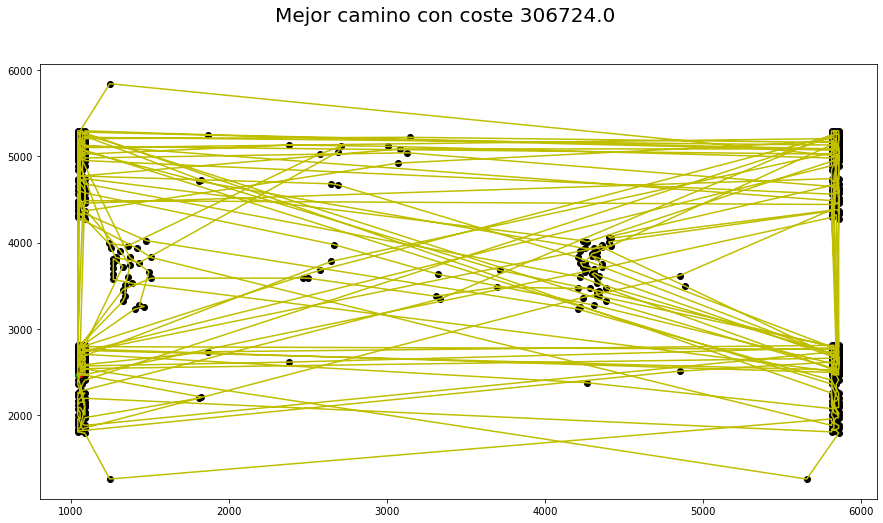

In [29]:
# Algoritmo de Enfriamiento Simulado
mu = 0.3
phi = 0.6
L = 20
enfriamientoSimuladoIteraciones(x, y, mu, phi, L)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,303327.0,1046400.0,12.262542
1,1.0,300146.0,1046400.0,12.684919
2,2.0,314311.0,1046400.0,13.654138
3,3.0,332022.0,1046400.0,12.228853
4,4.0,309083.0,1046400.0,12.593533
5,5.0,294195.0,1046400.0,12.541367
6,6.0,318720.0,1046400.0,11.877025
7,7.0,346665.0,1046400.0,12.158240
8,8.0,332439.0,1046400.0,12.059710
9,9.0,350500.0,1046400.0,12.161965


Media coste:  320140.8
Desviación típica coste:  19526.57295869173
Media numero de evaluaciones:  1046400.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  12.422229051589966


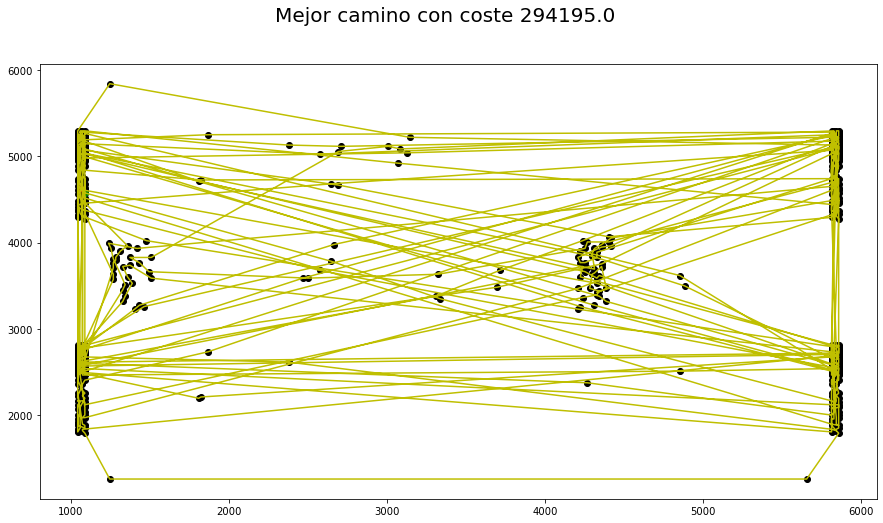

In [30]:
# Algoritmo de Enfriamiento Simulado
mu = 0.6
phi = 0.3
L = 20
enfriamientoSimuladoIteraciones(x, y, mu, phi, L)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,310021.0,1046400.0,13.015271
1,1.0,307275.0,1046400.0,12.673318
2,2.0,343511.0,1046400.0,11.659859
3,3.0,316030.0,1046400.0,14.416269
4,4.0,290996.0,1046400.0,18.392470
5,5.0,296576.0,1046400.0,16.848353
6,6.0,263555.0,1046400.0,18.770181
7,7.0,329614.0,1046400.0,17.021477
8,8.0,318310.0,1046400.0,16.858668
9,9.0,313947.0,1046400.0,16.224479


Media coste:  308983.5
Desviación típica coste:  21919.7503191883
Media numero de evaluaciones:  1046400.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  15.58803448677063


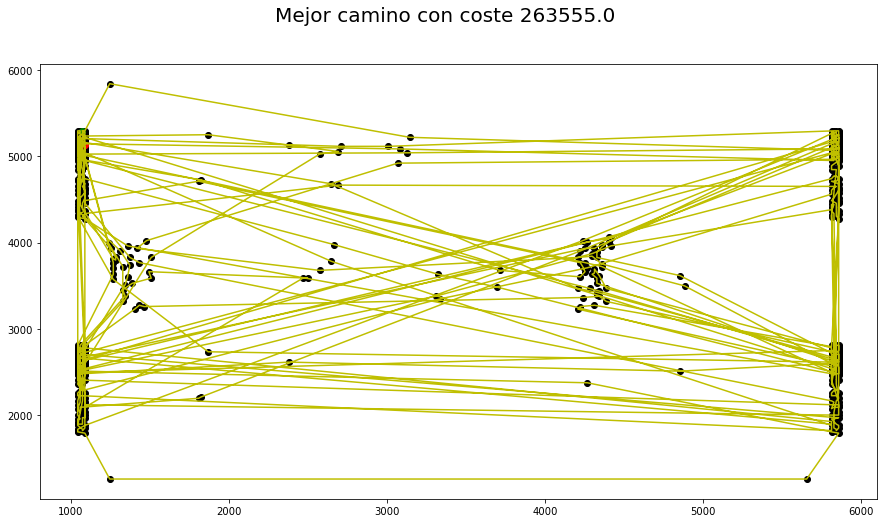

In [31]:
# Algoritmo de Enfriamiento Simulado
mu = 0.6
phi = 0.6
L = 20
enfriamientoSimuladoIteraciones(x, y, mu, phi, L)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,281915.0,2616000.0,40.867916
1,1.0,283524.0,2616000.0,37.667862
2,2.0,294722.0,2616000.0,39.993702
3,3.0,281931.0,2616000.0,41.995349
4,4.0,266579.0,2616000.0,46.063561
5,5.0,273898.0,2616000.0,41.358431
6,6.0,236175.0,2616000.0,41.226297
7,7.0,306689.0,2616000.0,40.622199
8,8.0,271421.0,2616000.0,39.736400
9,9.0,312036.0,2616000.0,38.517353


Media coste:  280889.0
Desviación típica coste:  21547.993368808664
Media numero de evaluaciones:  2616000.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  40.804907011985776


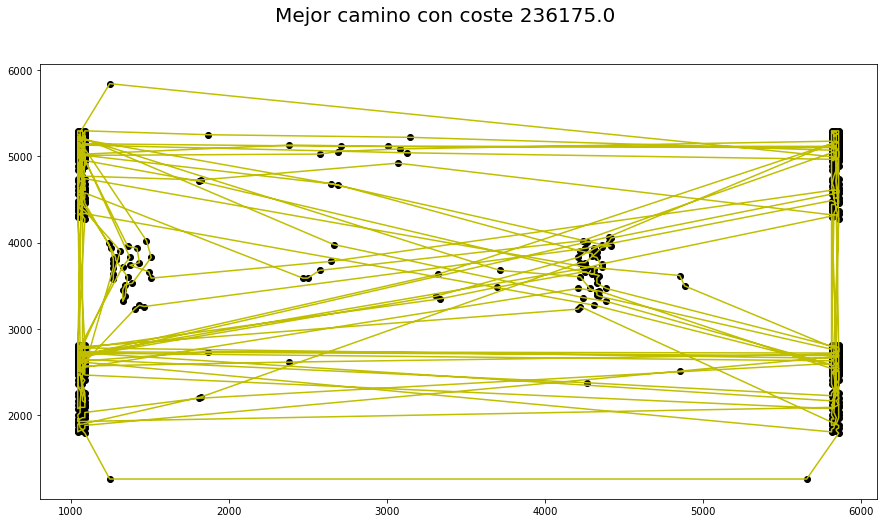

In [32]:
# Algoritmo de Enfriamiento Simulado
mu = 0.6
phi = 0.6
L = 50
enfriamientoSimuladoIteraciones(x, y, mu, phi, L)

# Búsqueda Tabú


In [33]:
# Greedy de la memoria de frecuencia eligiendo el menor
def greedyMenor(memoriaFrecuencias, n):
    memoriaTemporal = memoriaFrecuencias.copy()
    elegidos = []
    for i in range(0,n):
        provisional = np.where(memoriaTemporal[:][i] == np.amin(memoriaTemporal[:][i]))[0][0]
        elegidos.append(provisional)
        memoriaTemporal[: , provisional] = float('inf')
    
    return elegidos

In [34]:
# Algoritmo de búsqueda Tabú
def busquedaTabu(x, y, numVecinos, numIter, numReinici):
    analisisResultado = []
    mejorCam = []
    costeFinal = float("inf")
    for z in range(0,10):
        resultadoIntermedio = []
        tic()
        n = len(x)
        tenenciaTabu = round(n / 2)
        listaTabu = deque(maxlen=tenenciaTabu)
        sActual = solucionAleatoria(len(x),z)
        costeActual = calculaCoste(sActual)
        sBest = sActual.copy()
        costeBest = costeActual
        # Inicializo memoria de frecuencias
        memoriaFrecuencias = np.zeros((len(x),len(y)))
        for i in range(0,n):
            memoriaFrecuencias[i, sActual[i]] += 1
        
        iteraciones = numIter * n
        reinicializacion = round(iteraciones / (numReinici + 1))
        iterador = 0
        for i in range(0,iteraciones):
            # Genero/Analizo Vecinos
            mejorVecino = []
            costeMejor = float("inf")
            for k in range(0,numVecinos):
                piv1 = random.randint(0,len(x) - 1)
                piv2 = random.randint(0,len(x) - 1)
                sCandidata = sActual.copy()
                sCandidata[piv1], sCandidata[piv2] = sCandidata[piv2], sCandidata[piv1]
                costeCandidata = calculaCosteVecino(costeActual, sActual, sCandidata, piv1, piv2)
                iterador += 1
                
                seEvalua = False
                if((piv1,piv2) in listaTabu) or ((piv2,piv1) in listaTabu):
                    #Prueba de aspiración
                    if(costeCandidata < costeBest):
                        seEvalua = True
                else:
                    seEvalua = True
                    
                if (seEvalua and costeCandidata < costeMejor):  
                    mejorVecino = sCandidata.copy()
                    costeMejor = costeCandidata
                    mejorPiv1 = piv1
                    mejorPiv2 = piv2

            # Actualización de variables
            sActual = mejorVecino.copy()
            costeActual = costeMejor
            if costeMejor < costeBest:
                sBest = mejorVecino.copy()
                costeBest = costeMejor        

            # Actualizo Memoria de Frecuencias
            for p in range(0,n):
                memoriaFrecuencias[p, sActual[p]] += 1

            # Actualizo lista tabú
            listaTabu.append((mejorPiv1, mejorPiv2))
            
            # Reinicializaciones
            if ((i + 1) % reinicializacion) == 0:
                rnd = random.random()
                if rnd < 0.25:
                    # Solucion Inicial Aleatoria
                    sActual = random.sample(range(n),n)
                    costeActual = calculaCoste(sActual)
                elif rnd < 0.75:
                    # Solucion Greedy
                    sActual = greedyMenor(memoriaFrecuencias,n)
                    costeActual = calculaCoste(sActual) 
                else:
                    # Solucion es la mejor hasta el momento
                    sActual = sBest.copy()
                    costeActual = costeBest

                # Nueva Tenencia Tabú
                rnd2 = random.uniform(0,1)
                if rnd2 < 0.5:
                    tenenciaTabu = round(tenenciaTabu / 2)
                else:
                    tenenciaTabu = tenenciaTabu + round(tenenciaTabu / 2) 

                listaTabu = deque([],maxlen=tenenciaTabu)
        
        if costeBest < costeFinal:
            costeFinal = costeBest
            mejorCam = sBest.copy()
        
        t = toc()
        resultadoIntermedio.append(z)
        resultadoIntermedio.append(costeBest)
        resultadoIntermedio.append(iterador)
        resultadoIntermedio.append(t)
        analisisResultado.append(resultadoIntermedio)
        
    representaResultados(analisisResultado)
    pintaCamino(mejorCam,x,y, costeFinal)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,108089.0,1046400.0,34.170776
1,1.0,122300.0,1046400.0,52.932934
2,2.0,108059.0,1046400.0,42.073182
3,3.0,118714.0,1046400.0,37.593118
4,4.0,111457.0,1046400.0,39.571559
5,5.0,109016.0,1046400.0,66.994764
6,6.0,114339.0,1046400.0,38.488888
7,7.0,108905.0,1046400.0,44.523700
8,8.0,108388.0,1046400.0,33.081918
9,9.0,110058.0,1046400.0,32.993183


Media coste:  111932.5
Desviación típica coste:  4977.913379229405
Media numero de evaluaciones:  1046400.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  42.24240226745606


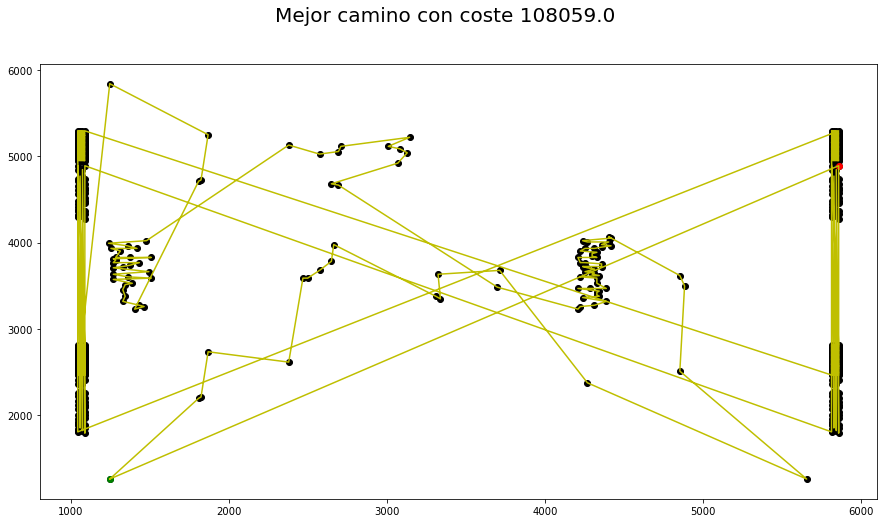

In [18]:
# Ejecución del algoritmo de Búsqueda Tabú
numIter = 40
numReinici = 4
numVecinos = 40
busquedaTabu(x, y, numVecinos, numIter, numReinici)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,108233.0,1569600.0,67.725491
1,1.0,130443.0,1569600.0,60.766584
2,2.0,108115.0,1569600.0,75.210606
3,3.0,112352.0,1569600.0,63.506739
4,4.0,108854.0,1569600.0,73.123920
5,5.0,258263.0,1569600.0,66.648829
6,6.0,114078.0,1569600.0,61.346149
7,7.0,116314.0,1569600.0,71.390164
8,8.0,108629.0,1569600.0,56.706034
9,9.0,110487.0,1569600.0,60.010329


Media coste:  127576.8
Desviación típica coste:  46407.05006258328
Media numero de evaluaciones:  1569600.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  65.64348459243774


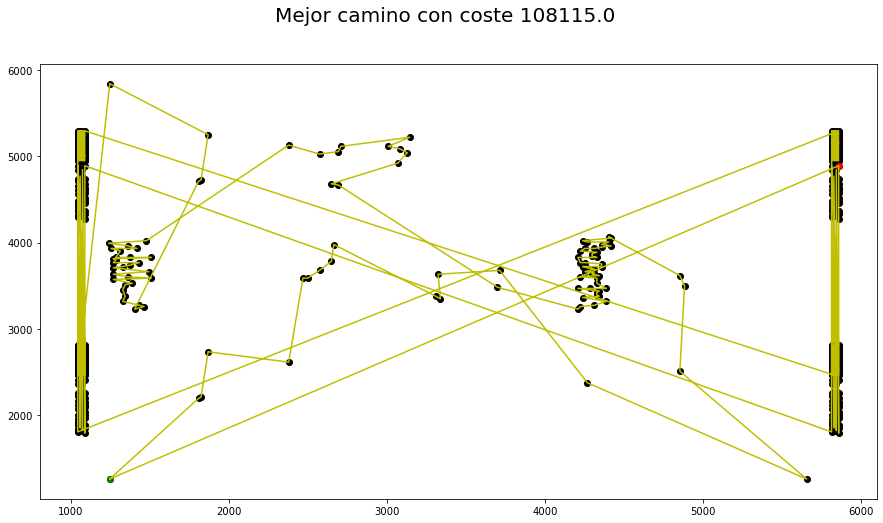

In [35]:
# Ejecución del algoritmo de Búsqueda Tabú
numIter = 60
numReinici = 4
numVecinos = 40
busquedaTabu(x, y, numVecinos, numIter, numReinici)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,107523.0,1046400.0,30.533506
1,1.0,107616.0,1046400.0,32.751083
2,2.0,107824.0,1046400.0,29.768625
3,3.0,107862.0,1046400.0,33.090222
4,4.0,107866.0,1046400.0,30.257506
5,5.0,107758.0,1046400.0,31.742459
6,6.0,107868.0,1046400.0,29.166522
7,7.0,107727.0,1046400.0,30.161883
8,8.0,107766.0,1046400.0,29.662220
9,9.0,107777.0,1046400.0,30.010352


Media coste:  107758.7
Desviación típica coste:  113.3853312088179
Media numero de evaluaciones:  1046400.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  30.71443772315979


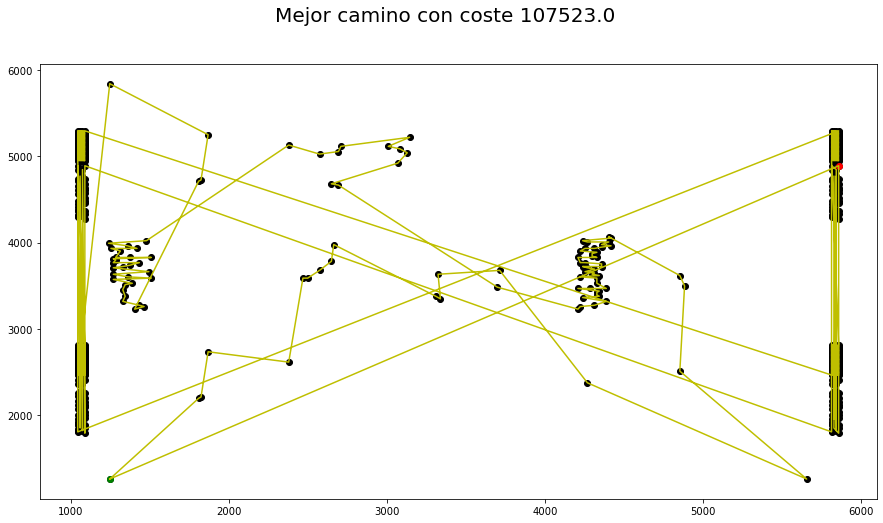

In [36]:
# Ejecución del algoritmo de Búsqueda Tabú
numIter = 40
numReinici = 150
numVecinos = 40
busquedaTabu(x, y, numVecinos, numIter, numReinici)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,100171.0,1831200.0,62.638678
1,1.0,107900.0,1831200.0,79.016339
2,2.0,106132.0,1831200.0,77.334055
3,3.0,105916.0,1831200.0,57.644969
4,4.0,107939.0,1831200.0,99.389401
5,5.0,112099.0,1831200.0,64.588704
6,6.0,110633.0,1831200.0,111.826895
7,7.0,109828.0,1831200.0,55.897626
8,8.0,113010.0,1831200.0,61.454662
9,9.0,308827.0,1831200.0,62.681949


Media coste:  128245.5
Desviación típica coste:  63555.74704540888
Media numero de evaluaciones:  1831200.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  73.2473278284073


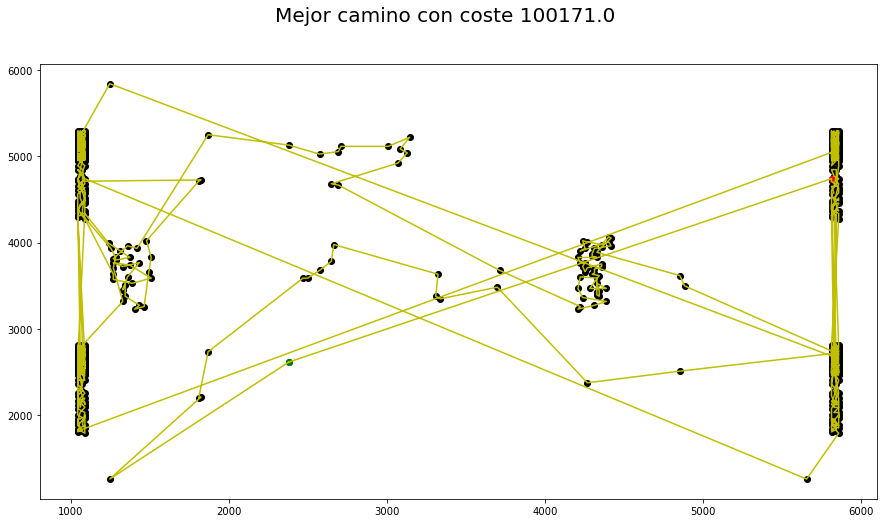

In [37]:
# Ejecución del algoritmo de Búsqueda Tabú
numIter = 40
numReinici = 4
numVecinos = 70
busquedaTabu(x, y, numVecinos, numIter, numReinici)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,108095.0,2746800.0,74.873673
1,1.0,102888.0,2746800.0,83.604167
2,2.0,114053.0,2746800.0,94.251012
3,3.0,114597.0,2746800.0,181.736371
4,4.0,108000.0,2746800.0,83.167668
5,5.0,106852.0,2746800.0,174.712690
6,6.0,111217.0,2746800.0,109.691996
7,7.0,109159.0,2746800.0,97.183394
8,8.0,112048.0,2746800.0,79.850118
9,9.0,110682.0,2746800.0,75.180095


Media coste:  109759.1
Desviación típica coste:  3526.8204267047995
Media numero de evaluaciones:  2746800.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  105.42511825561523


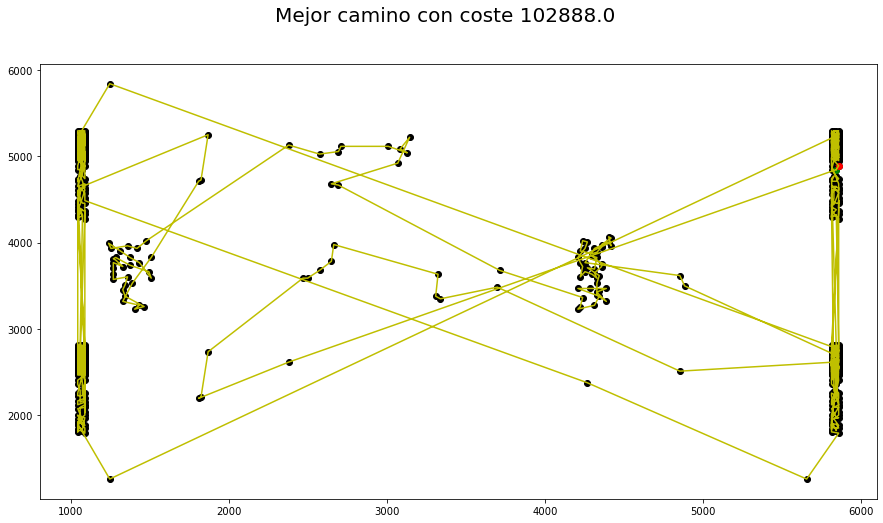

In [38]:
# Ejecución del algoritmo de Búsqueda Tabú
numIter = 60
numReinici = 10
numVecinos = 70
busquedaTabu(x, y, numVecinos, numIter, numReinici)